In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path_credit = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2.2//E Case Studies//11. Capstone Case Study - Predict Cred Card Consumption//"
file_name_credit = "CreditConsumptionData.xlsx"
file_path_credit + file_name_credit

file_path_behave = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2.2//E Case Studies//11. Capstone Case Study - Predict Cred Card Consumption//"
file_name_behave= "CustomerBehaviorData.xlsx"
file_path_behave + file_name_behave

file_path_demog = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2.2//E Case Studies//11. Capstone Case Study - Predict Cred Card Consumption//"
file_name_demog = "CustomerDemographics.xlsx"
file_path_demog + file_name_demog

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2.2//E Case Studies//11. Capstone Case Study - Predict Cred Card Consumption//CustomerDemographics.xlsx'

In [3]:
cred = pd.read_excel(file_path_credit + file_name_credit)
behv = pd.read_excel(file_path_behave + file_name_behave)
demog = pd.read_excel(file_path_demog + file_name_demog)

In [5]:
# Average Credit Card Spend in next three months is a regression type prediction. 
# so we will use the regression based models for the prediction purpose.

In [4]:
cred.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [5]:
behv.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [6]:
demog.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [7]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [8]:
behv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [9]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [10]:
print(cred.duplicated().sum())
print(behv.duplicated().sum())
print(demog.duplicated().sum())
print(cred['ID'].nunique())
print(behv['ID'].nunique())
print(demog['ID'].nunique())

0
0
0
20000
20000
20000


In [4]:
table = pd.merge(demog,behv, on='ID', how='left')

In [5]:
final = pd.merge(table,cred, on='ID', how='left')
final.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [13]:
final.shape

(20000, 49)

In [14]:
final.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [15]:
final.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                     float64
NetBanking_Flag                   int64
Avg_days_between_transaction    float64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64


In [16]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,20000.0,9999.500000,5.773647e+03,0.00,4999.750,9999.5000,14999.2500,19999.00
age,20000.0,47.672300,3.035977e+01,25.00,33.000,40.0000,53.0000,223.00
Emp_Tenure_Years,20000.0,15.217250,2.048145e+01,0.50,5.100,9.9000,18.0000,203.00
Tenure_with_Bank,20000.0,5.496050,2.870452e+00,1.00,3.000,6.0000,8.0000,10.00
region_code,19999.0,598.959348,2.201052e+02,123.00,424.000,623.0000,799.0000,974.00
NetBanking_Flag,20000.0,0.718000,4.499846e-01,0.00,0.000,1.0000,1.0000,1.00
Avg_days_between_transaction,19997.0,11.044757,5.480552e+00,2.00,6.000,11.0000,16.0000,20.00
cc_cons_apr,20000.0,17856.990922,2.515888e+04,253.00,4377.000,10214.6425,21189.0000,441031.33
dc_cons_apr,20000.0,8130.453414,1.457219e+04,19.35,1624.650,3964.7500,9339.0200,229255.00
cc_cons_may,19999.0,16188.364717,2.651068e+04,157.00,3635.910,8635.2300,18655.3050,1117246.31


In [17]:
for col in final.columns:
    if final[col].nunique() <= 1:
        print(col, final[col].nunique())

personal_loan_active 1
vehicle_loan_active 1
personal_loan_closed 1
vehicle_loan_closed 1
loan_enq 1


In [18]:
final.loc[:,['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']]

,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,loan_enq
0,1,1,1.0,1,Y
1,1,1,1.0,1,Y
2,1,1,1.0,1,Y
3,1,1,1.0,1,Y
4,1,1,1.0,1,Y
...,...,...,...,...,...
19995,1,1,1.0,1,Y
19996,1,1,1.0,1,Y
19997,1,1,1.0,1,Y
19998,1,1,1.0,1,Y


In [6]:
# As there are columns where we have only one unique value, those columns will add no value in our
# model building activity. So we are dropping columns with 1 unique value and also the ID columns
final.drop(['ID','personal_loan_active','vehicle_loan_active',
            'personal_loan_closed','vehicle_loan_closed','loan_enq'], axis=1, inplace=True)

In [7]:
# seperating the categorical and numerical data type
final_float = final.select_dtypes(['float64'])
final_int = final.select_dtypes(['int64'])
final_obj = final.select_dtypes(['object'])

In [24]:
final_float.head()

,Emp_Tenure_Years,region_code,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,debit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,max_credit_amount_jun,emi_active,cc_cons
0,15.0,708.0,17.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,...,24.0,25296.0,11527.50,191777.13,24563.0,30051.32,12761.0,50836.0,1674.09,20014.0
1,15.0,123.0,14.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,...,35.0,80750.0,92276.57,71162.00,23948.0,42119.05,76206.0,23226.0,13043.34,10173.0
2,24.5,802.0,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,...,72.0,38466.0,19343.00,70978.00,10752.0,58373.25,75283.0,27036.0,25375.27,16095.0
3,4.5,867.0,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,...,43.0,52732.0,43867.91,63033.84,12607.0,69851.51,68708.0,43037.0,3544.33,7707.0
4,12.6,802.0,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,...,46.0,19613.0,153253.71,30286.00,25213.0,10071.00,80140.0,32044.0,12780.44,96408.0


In [25]:
final_int.head()

,age,Tenure_with_Bank,NetBanking_Flag,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,credit_count_apr,credit_count_may,debit_count_may,credit_count_jun,debit_count_jun
0,35,1,0,26,10,48,14,47,430000,6,2,40,2,65
1,35,6,0,7,13,3,21,31,127500,36,2,78,21,63
2,55,1,1,32,102,4,1,80,199999,9,2,82,7,1
3,29,6,1,1,50,1,1,10,155000,30,23,38,21,83
4,34,4,1,47,82,54,16,68,297000,36,24,50,8,32


In [26]:
final_obj.head()

,account_type,gender,Income
0,current,M,MEDIUM
1,current,M,HIGH
2,current,M,MEDIUM
3,current,F,MEDIUM
4,current,M,MEDIUM


In [27]:
# perform outlier treatment on numerical data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

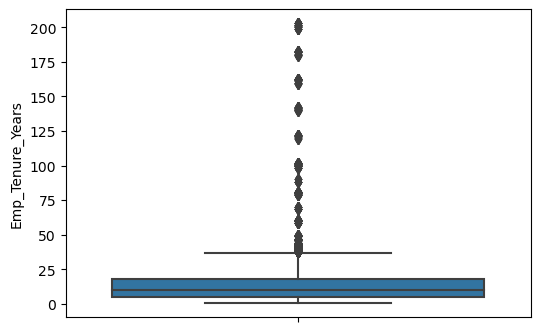

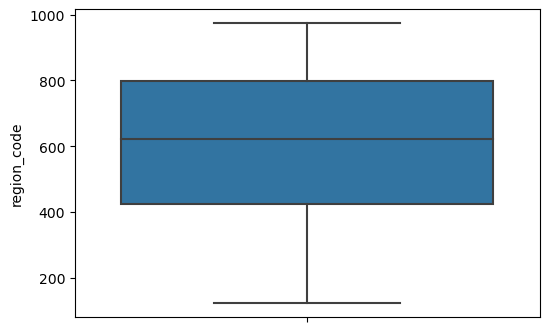

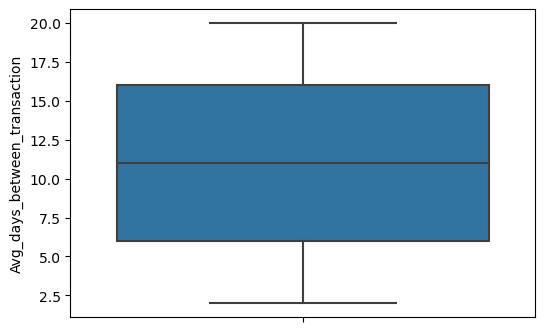

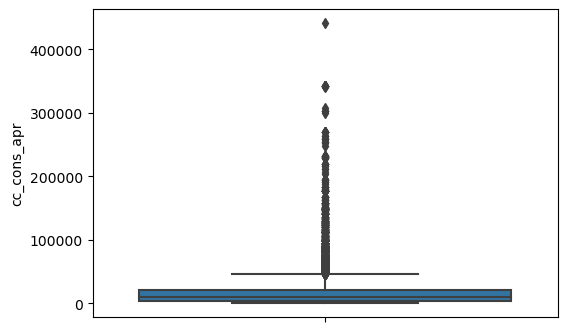

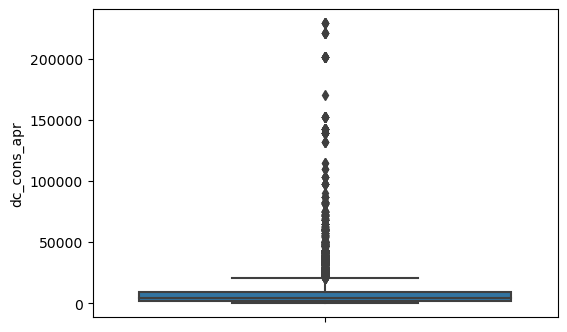

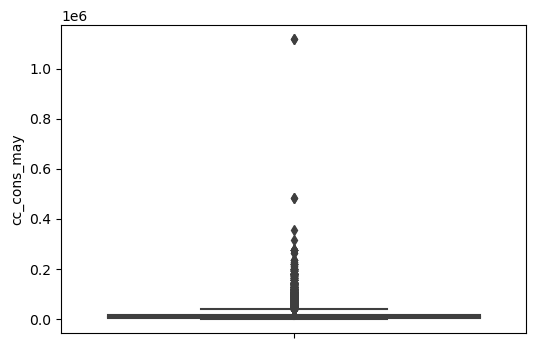

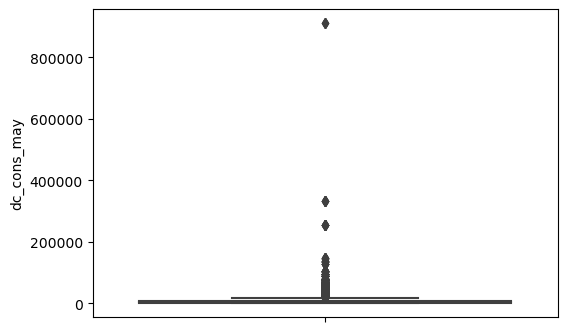

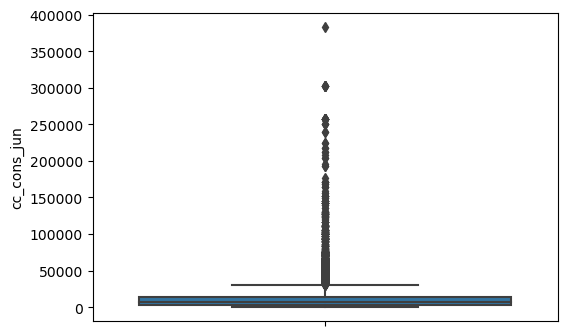

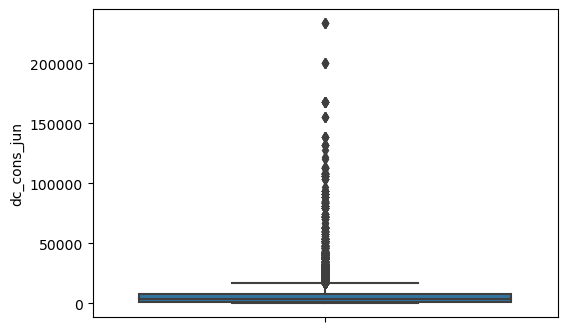

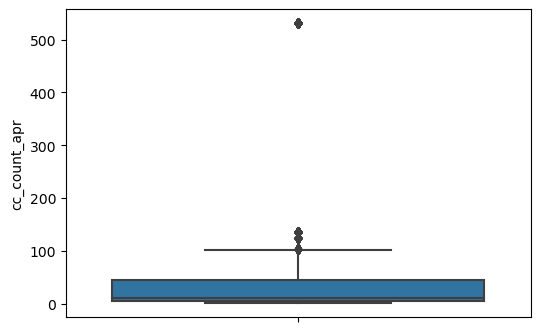

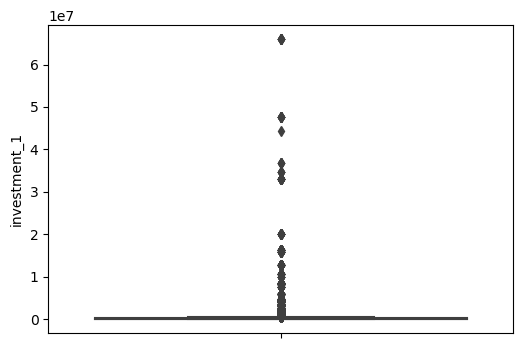

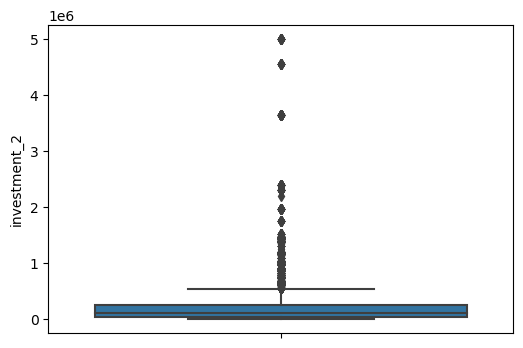

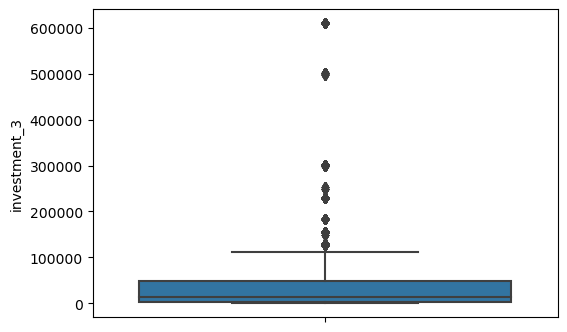

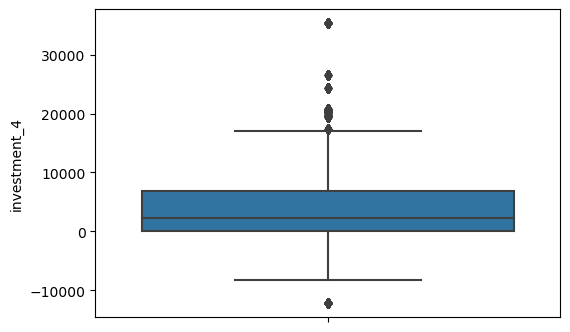

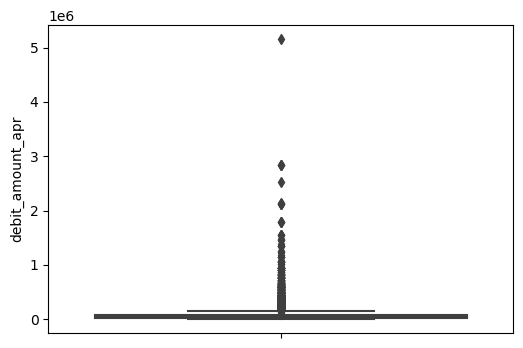

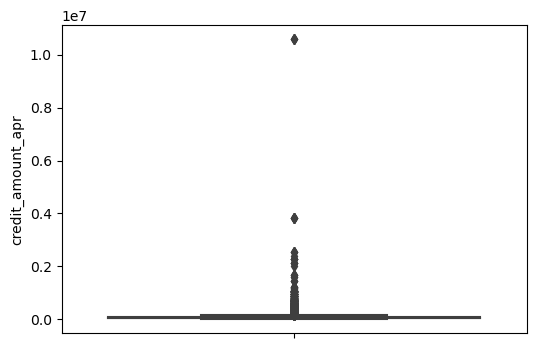

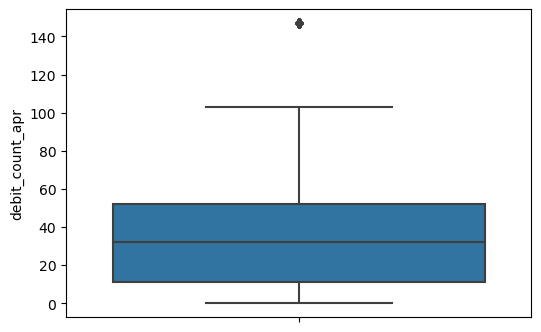

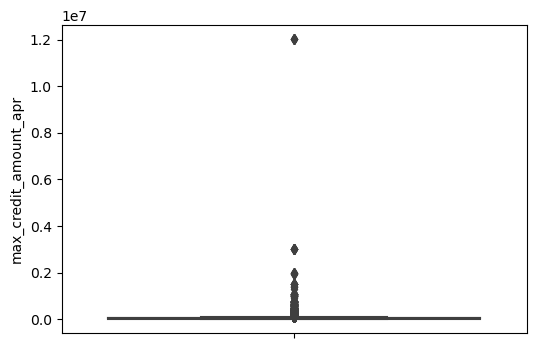

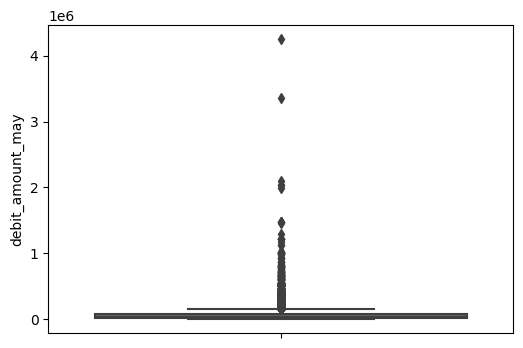

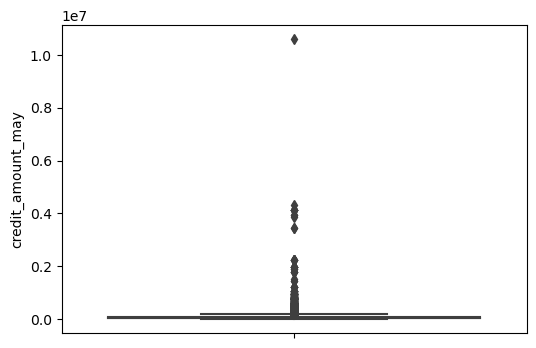

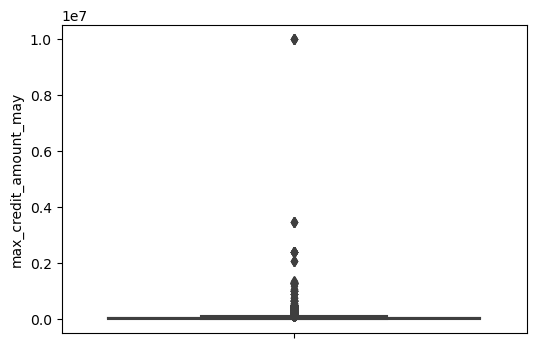

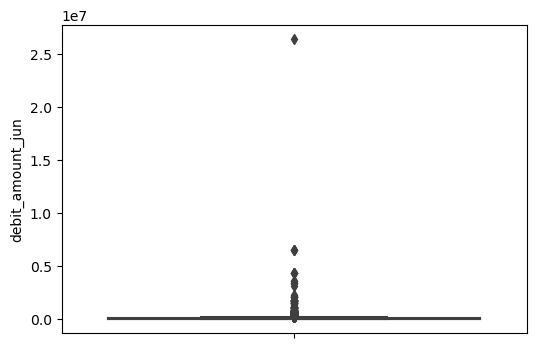

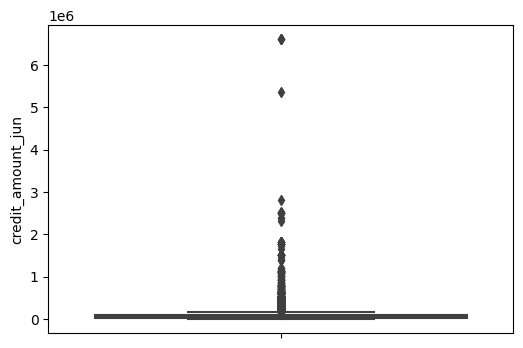

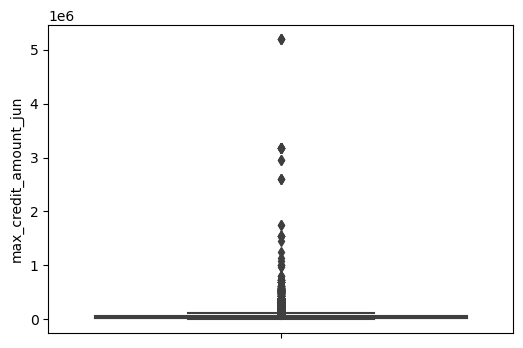

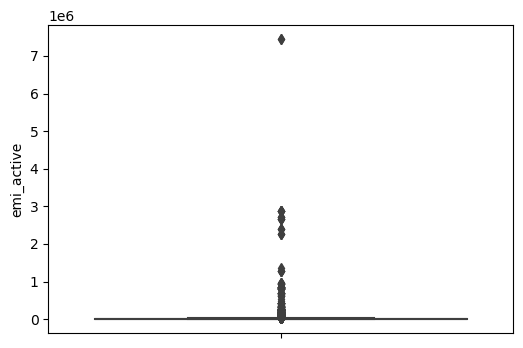

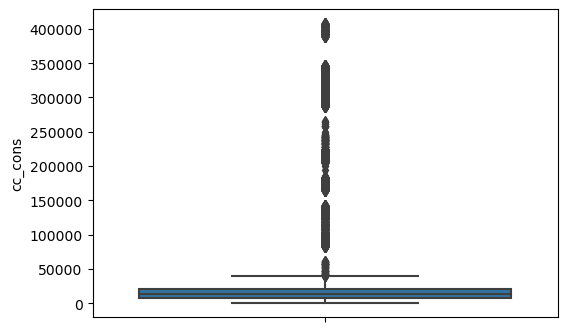

In [22]:
for col in final_float.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=final_float, y=col)
    plt.show()

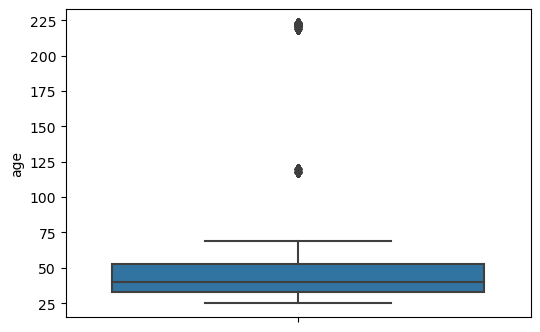

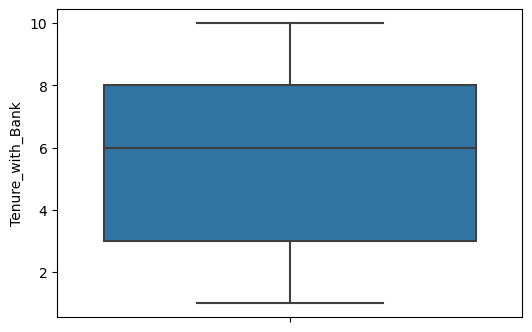

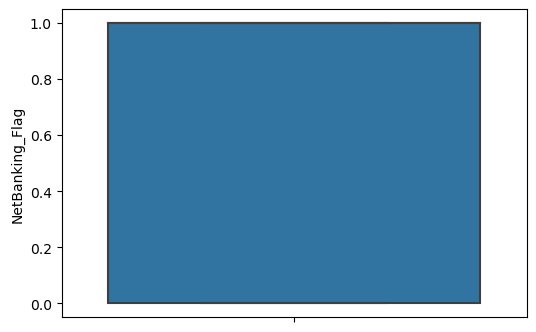

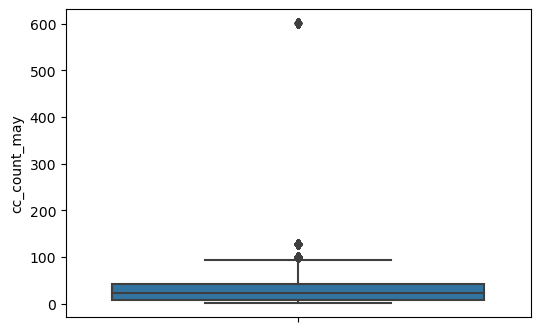

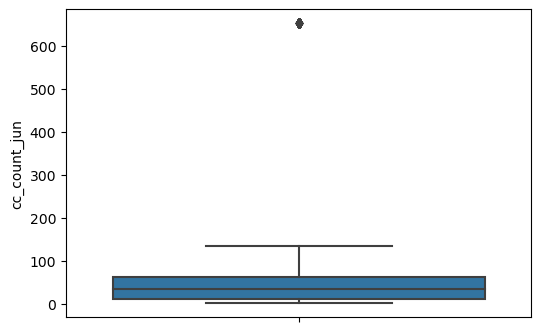

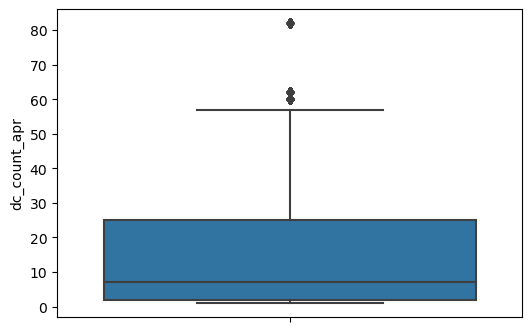

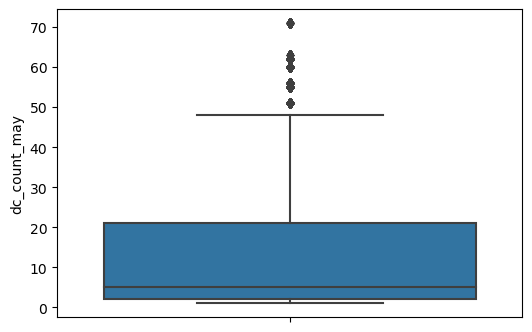

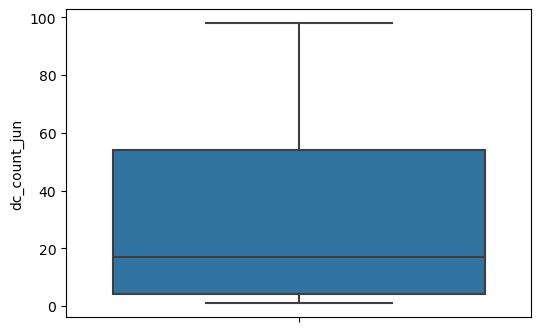

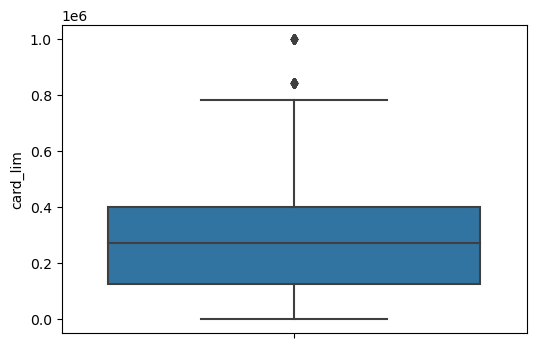

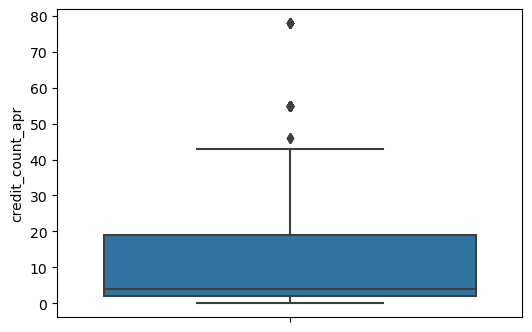

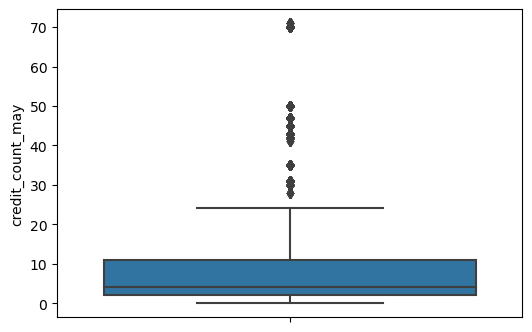

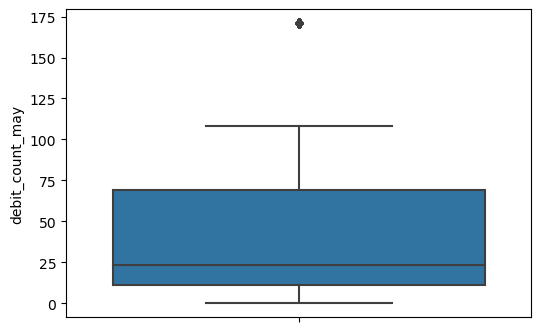

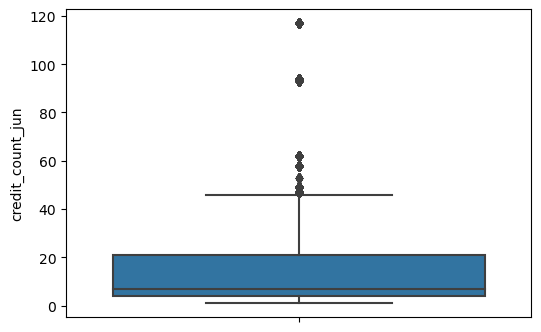

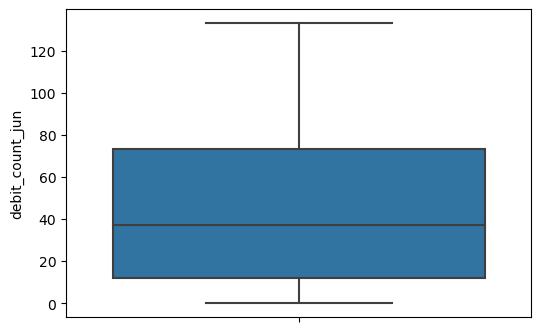

In [27]:
for col in final_int.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=final_int, y=col)
    plt.show()

In [9]:
## treating the outlier in age and emp_tenure_years column with median and mean
final_float.loc[final_float['Emp_Tenure_Years'] > 50,
                'Emp_Tenure_Years'] = final_float['Emp_Tenure_Years'].mean()

final_int.loc[final_int['age'] > 75,
                'age'] = final_int['age'].median()

In [10]:
final_float = final_float.apply(
    lambda x: x.clip(lower=x.quantile(0.05), upper=x.quantile(0.95)))

In [11]:
final_int = final_int.apply(
    lambda x: x.clip(lower=x.quantile(0.05), upper=x.quantile(0.95)))

In [35]:
# perform missing value treatment

In [12]:
final_cleaned = pd.concat([final_float,final_int,final_obj], axis=1).reset_index(drop=True)

In [56]:
final_cleaned.isnull().sum()

Emp_Tenure_Years                   0
region_code                        1
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
max_credit_amount_apr              0
debit_amount_may                   0
credit_amount_may                  0
max_credit_amount_may              0
debit_amount_jun                   0
credit_amount_jun                  0
max_credit_amount_jun              0
emi_active                         1
cc_cons                         5000
age                                0
T

In [12]:
final_cleaned.dropna(inplace=True)

In [58]:
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14997 entries, 111 to 15110
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Emp_Tenure_Years              14997 non-null  float64
 1   region_code                   14997 non-null  float64
 2   Avg_days_between_transaction  14997 non-null  float64
 3   cc_cons_apr                   14997 non-null  float64
 4   dc_cons_apr                   14997 non-null  float64
 5   cc_cons_may                   14997 non-null  float64
 6   dc_cons_may                   14997 non-null  float64
 7   cc_cons_jun                   14997 non-null  float64
 8   dc_cons_jun                   14997 non-null  float64
 9   cc_count_apr                  14997 non-null  float64
 10  investment_1                  14997 non-null  float64
 11  investment_2                  14997 non-null  float64
 12  investment_3                  14997 non-null  float64
 13  inve

In [77]:
final_cleaned = final_cleaned.reset_index(drop=True)
final_cleaned.head()

,Emp_Tenure_Years,region_code,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,dc_count_jun,card_lim,credit_count_apr,credit_count_may,debit_count_may,credit_count_jun,debit_count_jun,account_type,gender,Income
0,15.0,708.0,17.0,24893.00,378.00,10288.00,25584.00,16291.40,11432.00,2.0,...,47,430000,6,2,40,2,65,current,M,MEDIUM
1,15.0,249.0,14.0,18941.62,966.00,20672.00,410.97,4217.00,885.00,1.0,...,31,127500,36,2,78,21,63,current,M,HIGH
2,24.5,802.0,3.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,...,80,199999,9,2,82,7,2,current,M,MEDIUM
3,4.5,867.0,4.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,...,10,155000,30,23,38,21,83,current,F,MEDIUM
4,12.6,802.0,7.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,...,68,297000,36,24,50,8,32,current,M,MEDIUM


In [78]:
final_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Emp_Tenure_Years,14997.0,12.448621,9.310542,1.70000,5.10,9.90,16.80,3.500000e+01
region_code,14997.0,598.334067,216.231977,249.00000,424.00,623.00,799.00,9.370000e+02
Avg_days_between_transaction,14997.0,11.048610,5.492044,2.00000,6.00,11.00,16.00,2.000000e+01
cc_cons_apr,14997.0,15950.999056,15856.449111,1219.00000,4411.22,10288.10,21405.00,5.910673e+04
dc_cons_apr,14997.0,6857.910417,7395.286827,378.00000,1634.00,3994.80,9339.02,2.783500e+04
cc_cons_may,14997.0,14107.253287,14447.346896,1035.77400,3638.00,8694.00,18951.30,5.396238e+04
dc_cons_may,14997.0,6277.222711,6653.141128,410.97000,1643.50,3821.00,8212.00,2.558400e+04
cc_cons_jun,14997.0,10572.471158,10544.172153,825.10100,3004.50,6655.25,14247.00,3.997968e+04
dc_cons_jun,14997.0,5815.330891,6440.497838,390.00000,1358.00,3327.00,7597.00,2.425288e+04
cc_count_apr,14997.0,27.152030,33.817496,1.00000,5.00,10.00,44.00,1.240000e+02


In [80]:
final_cleaned.columns

Index(['Emp_Tenure_Years', 'region_code', 'Avg_days_between_transaction',
       'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'age', 'Tenure_with_Bank', 'NetBanking_Flag',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'credit_count_apr', 'credit_count_may',
       'debit_count_may', 'credit_count_jun', 'debit_count_jun',
       'account_type', 'gender', 'Income'],
      dtype='object')

In [81]:
cols = ['Emp_Tenure_Years', 'region_code', 'Avg_days_between_transaction',
       'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'age', 'Tenure_with_Bank', 'NetBanking_Flag',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'credit_count_apr', 'credit_count_may',
       'debit_count_may', 'credit_count_jun', 'debit_count_jun']

In [87]:
final_cleaned[cols].corr()

,Emp_Tenure_Years,region_code,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,credit_count_apr,credit_count_may,debit_count_may,credit_count_jun,debit_count_jun
Emp_Tenure_Years,1.000000,-0.006537,0.005360,-0.004293,-0.005338,-0.010651,0.011746,-0.020326,0.008232,0.006580,...,0.000405,-0.001397,0.011927,0.010347,0.007487,0.012788,-0.005721,0.003454,-0.012273,0.006444
region_code,-0.006537,1.000000,-0.016963,-0.006350,-0.006716,-0.004065,-0.008098,-0.006054,0.011837,-0.005692,...,-0.007921,-0.017693,-0.004304,-0.019724,-0.000769,-0.007270,-0.008258,0.003323,0.003604,0.010378
Avg_days_between_transaction,0.005360,-0.016963,1.000000,0.008996,0.003421,0.013006,0.009573,0.003449,-0.002196,-0.019318,...,-0.003572,0.001499,-0.013424,0.001092,0.007806,-0.017863,0.003982,-0.000371,-0.004042,0.000488
cc_cons_apr,-0.004293,-0.006350,0.008996,1.000000,-0.003080,0.019245,0.003754,-0.007350,0.007111,-0.001953,...,0.009642,0.000115,-0.013976,0.007396,-0.005090,-0.005903,-0.004730,-0.002062,-0.017264,0.010561
dc_cons_apr,-0.005338,-0.006716,0.003421,-0.003080,1.000000,-0.008563,-0.001606,-0.004089,0.000950,0.002986,...,0.008388,0.002872,0.010136,0.016382,-0.007041,-0.000309,-0.001944,0.002310,-0.016527,-0.007717
cc_cons_may,-0.010651,-0.004065,0.013006,0.019245,-0.008563,1.000000,-0.005512,-0.016585,-0.002047,-0.016213,...,-0.007520,-0.006856,-0.007563,0.001450,0.011380,-0.014676,0.004510,-0.011882,0.005491,-0.010293
dc_cons_may,0.011746,-0.008098,0.009573,0.003754,-0.001606,-0.005512,1.000000,-0.005749,-0.003471,-0.002741,...,-0.014403,-0.020423,-0.000819,-0.005128,-0.000393,-0.007243,0.005003,0.001107,-0.014293,0.007003
cc_cons_jun,-0.020326,-0.006054,0.003449,-0.007350,-0.004089,-0.016585,-0.005749,1.000000,-0.000134,0.000783,...,0.014533,-0.008596,0.002239,-0.007049,-0.000021,-0.008956,-0.007480,-0.014894,0.001304,0.019323
dc_cons_jun,0.008232,0.011837,-0.002196,0.007111,0.000950,-0.002047,-0.003471,-0.000134,1.000000,-0.010418,...,0.006545,-0.000671,0.004249,0.001687,-0.002851,0.001712,-0.004570,-0.006250,0.011699,-0.004289
cc_count_apr,0.006580,-0.005692,-0.019318,-0.001953,0.002986,-0.016213,-0.002741,0.000783,-0.010418,1.000000,...,0.002975,-0.007807,-0.008608,0.001259,-0.005381,0.002509,0.010669,0.005374,-0.000745,-0.015712


C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


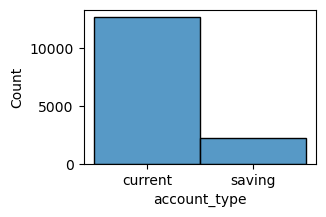

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


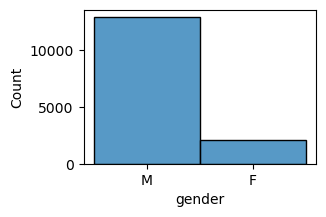

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


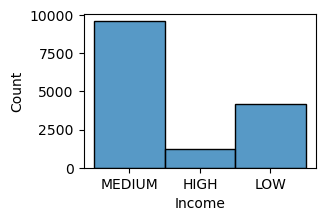

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


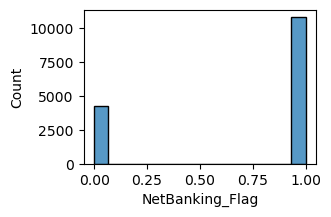

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


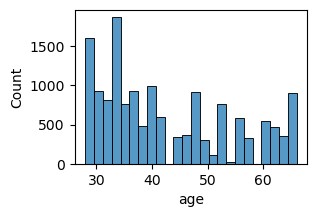

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


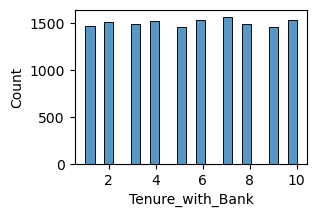

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


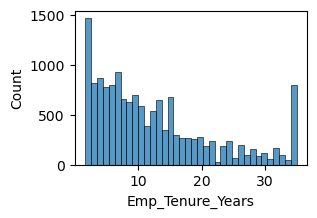

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


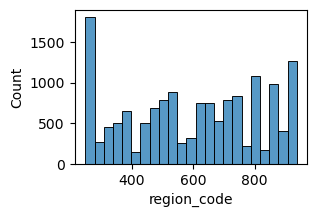

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


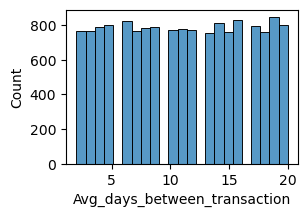

In [75]:
cols = ['account_type','gender','Income','NetBanking_Flag',
        'age','Tenure_with_Bank','Emp_Tenure_Years', 
        'region_code', 'Avg_days_between_transaction']
for c in cols:
    plt.figure(figsize=(3,2))
    sns.histplot(x = c, data=final_cleaned)
    plt.show()

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


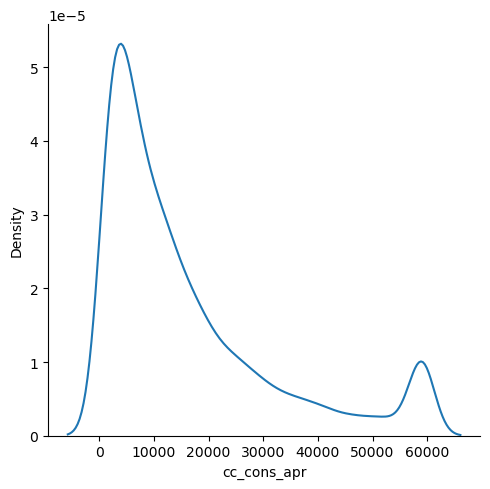

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


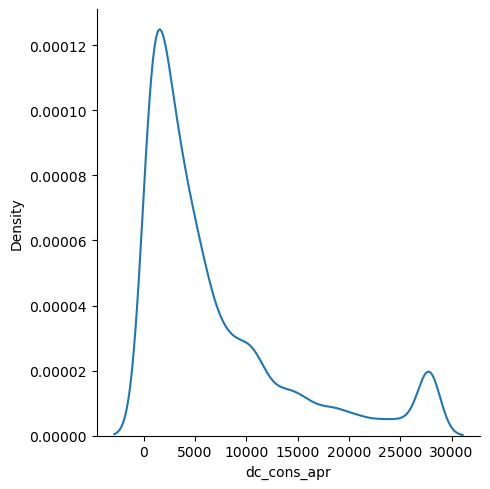

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


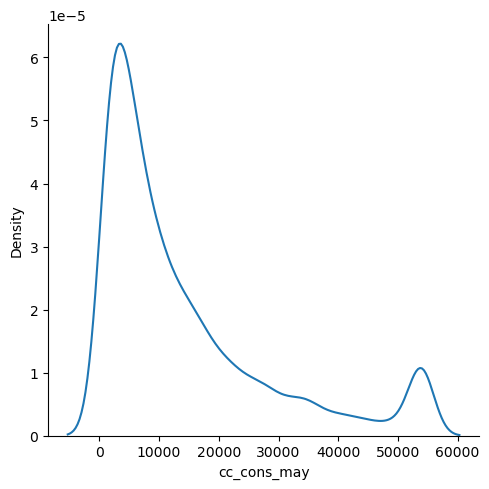

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


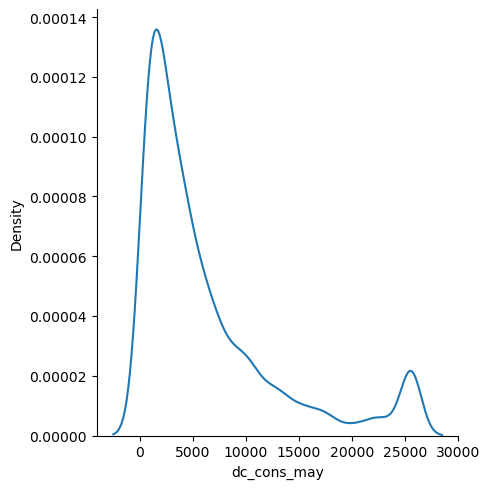

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


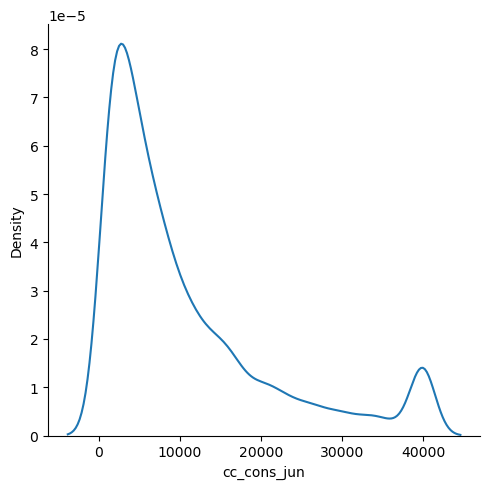

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


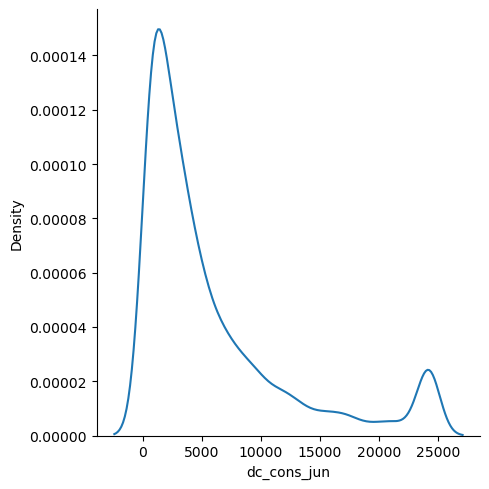

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


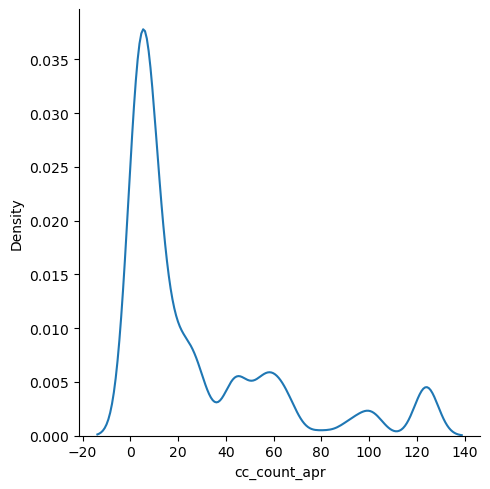

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


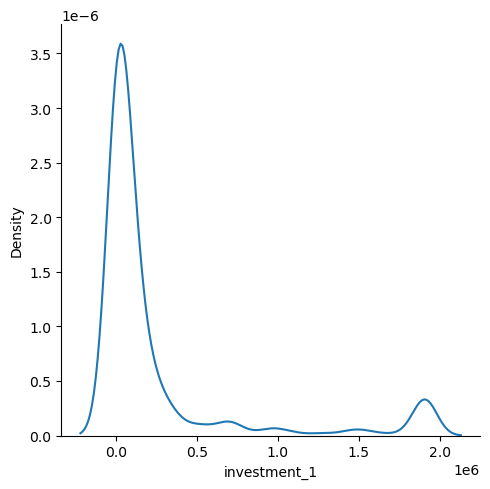

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


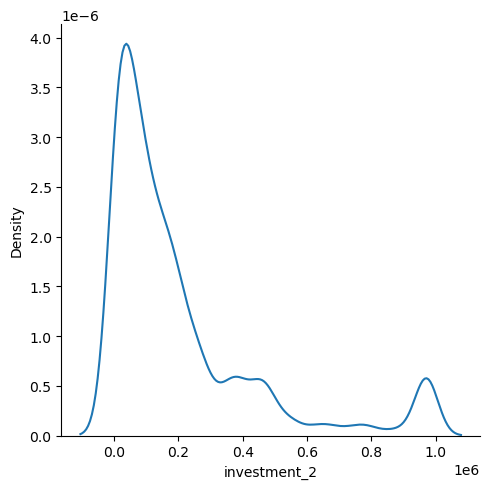

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


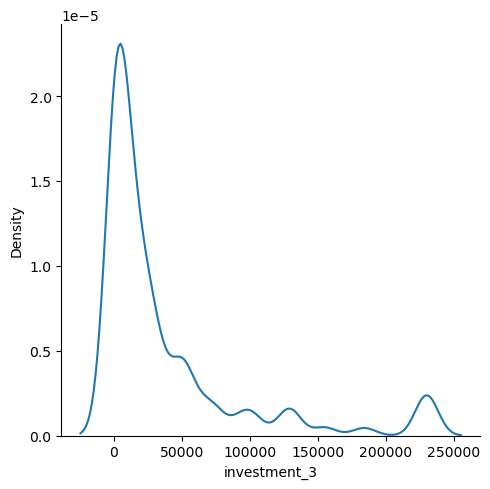

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


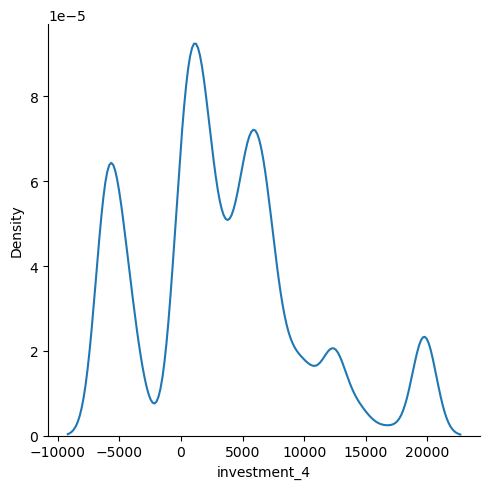

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


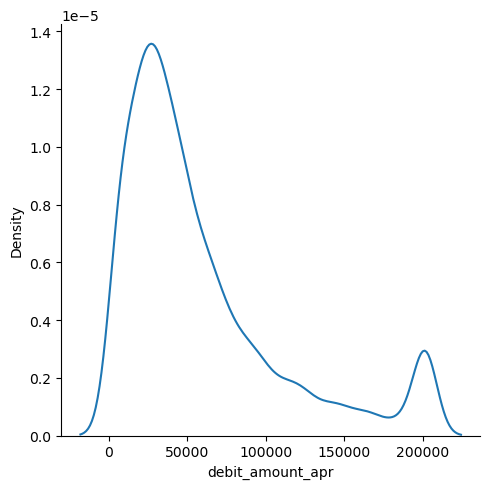

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


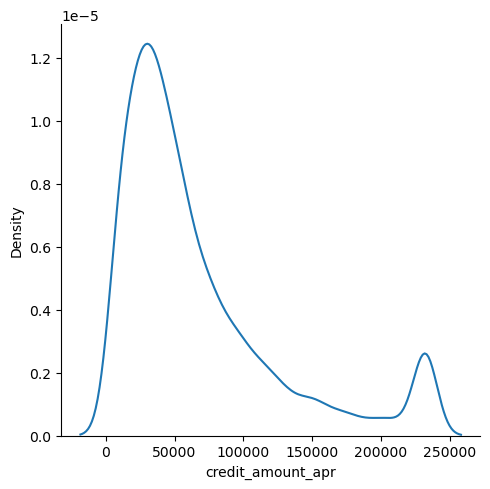

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


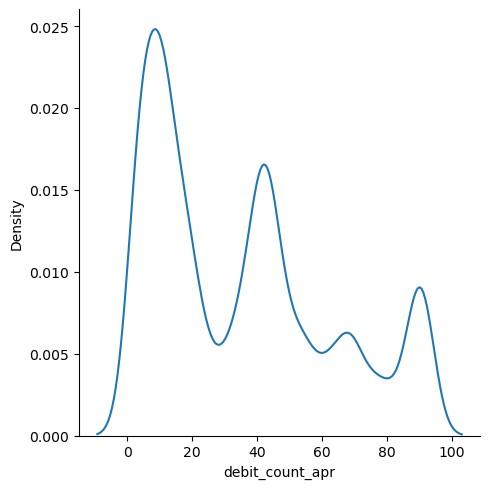

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


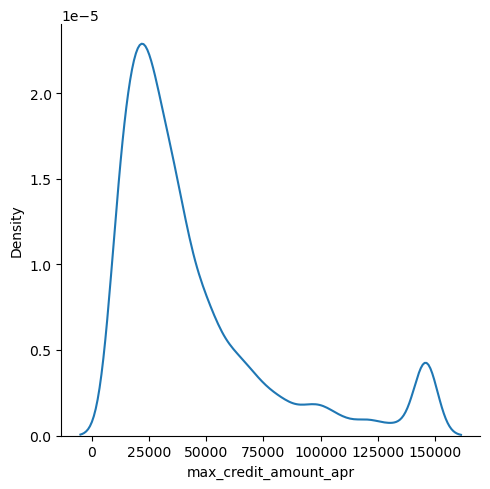

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


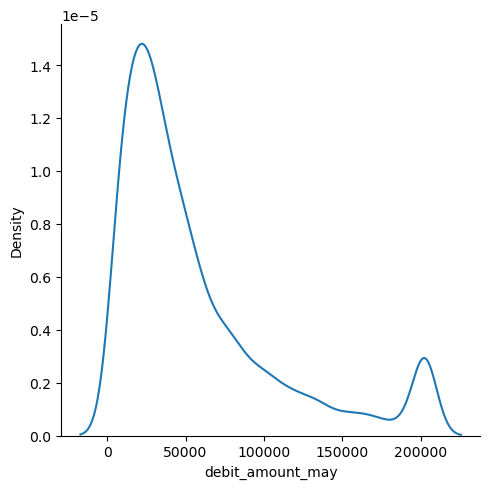

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


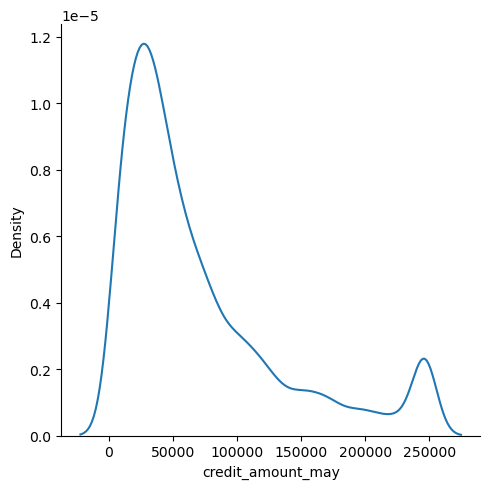

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


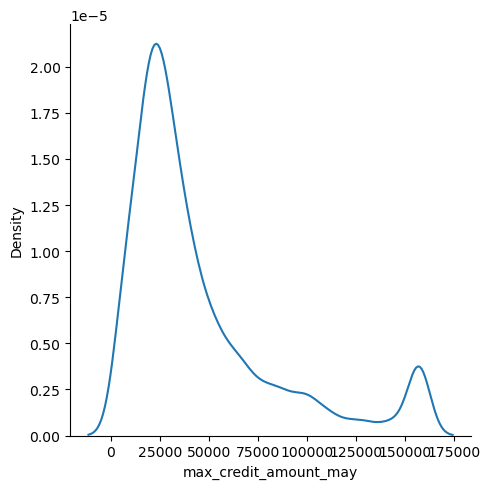

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


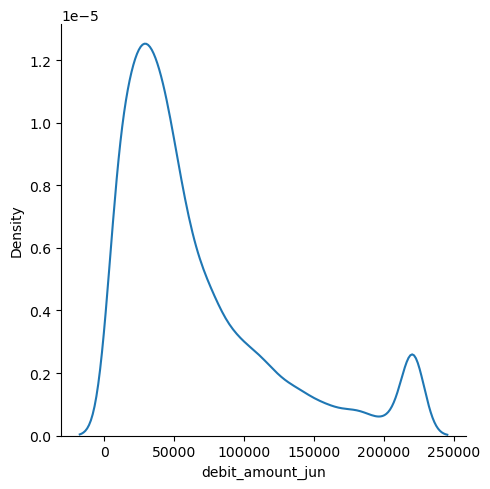

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


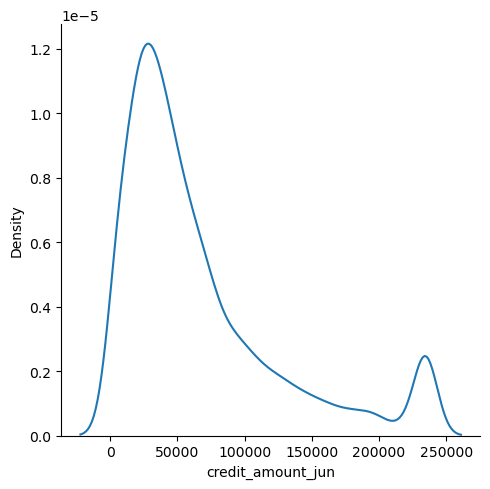

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


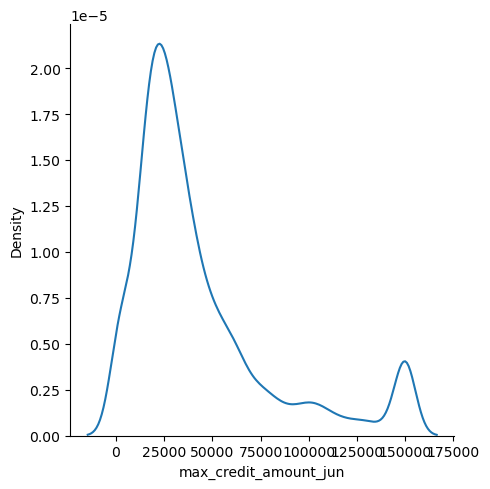

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


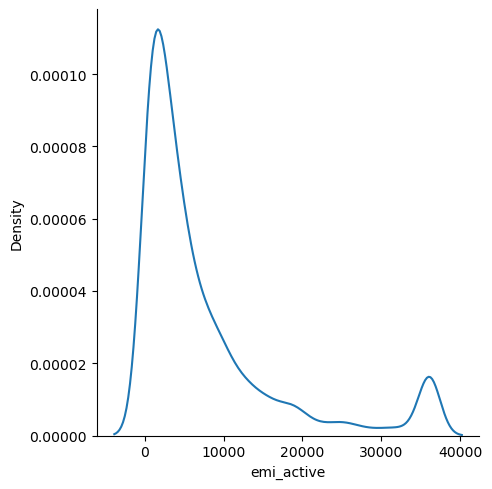

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


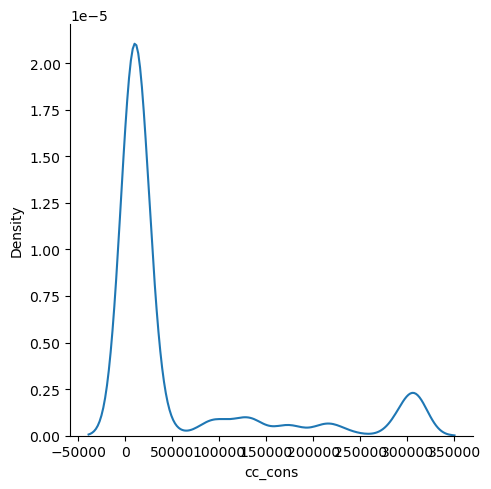

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


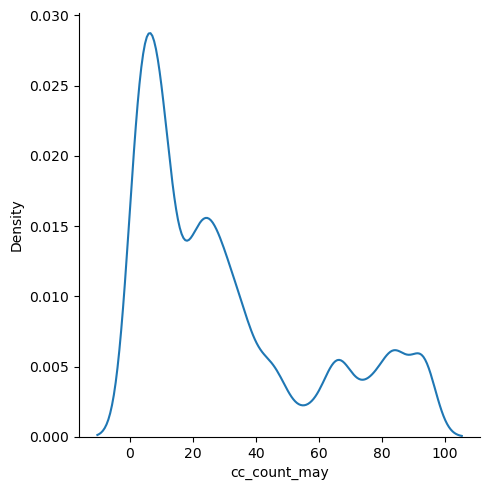

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


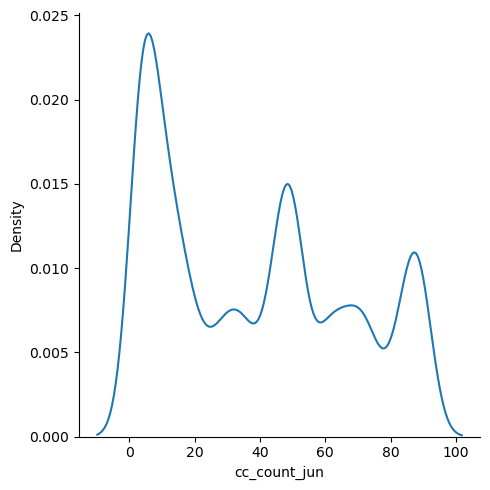

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


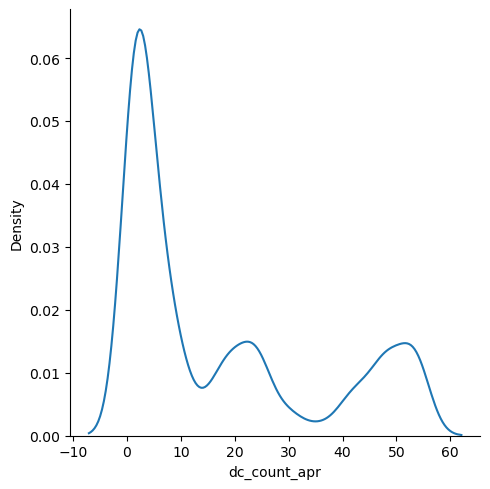

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


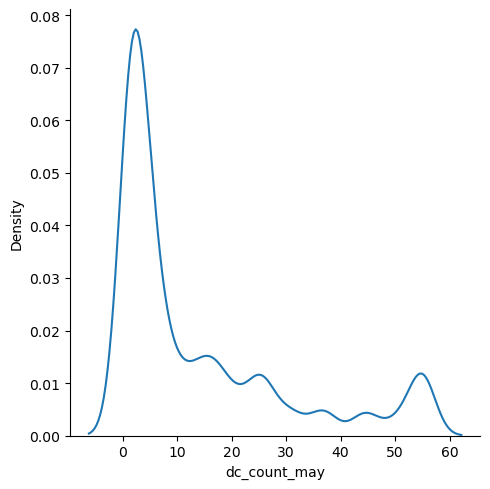

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


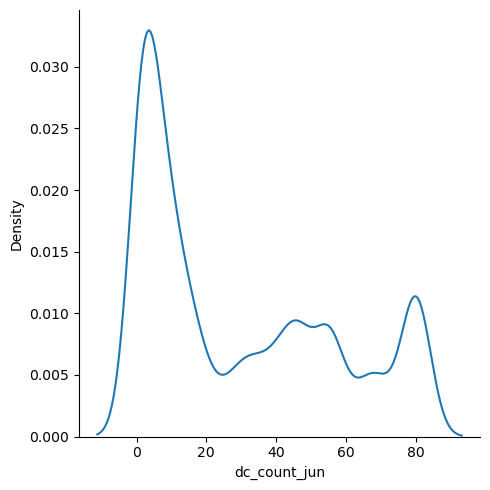

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


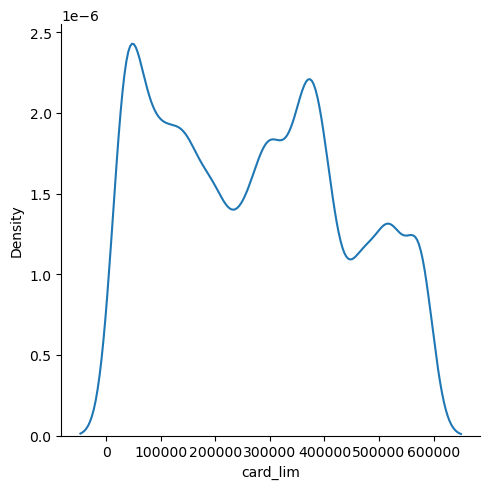

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


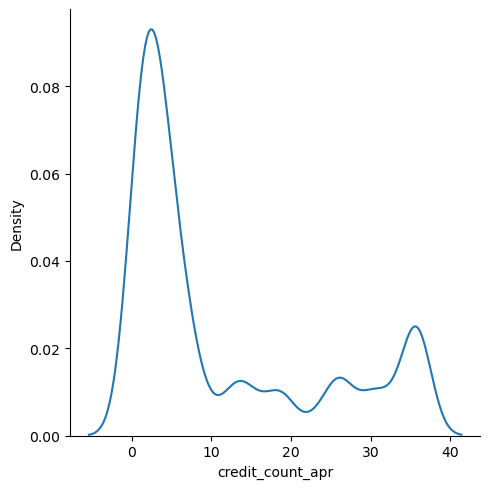

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


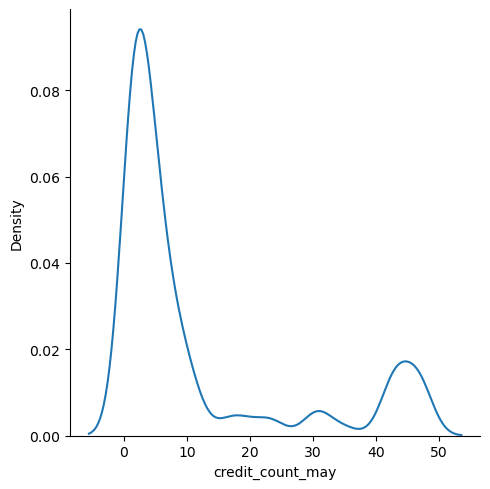

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


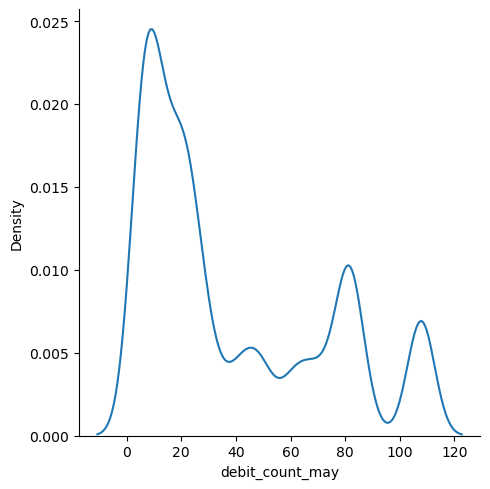

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


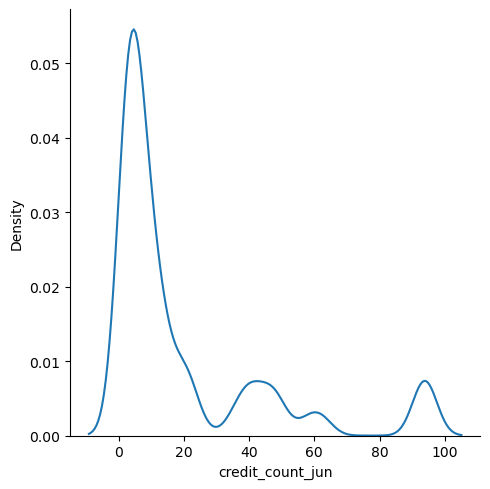

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


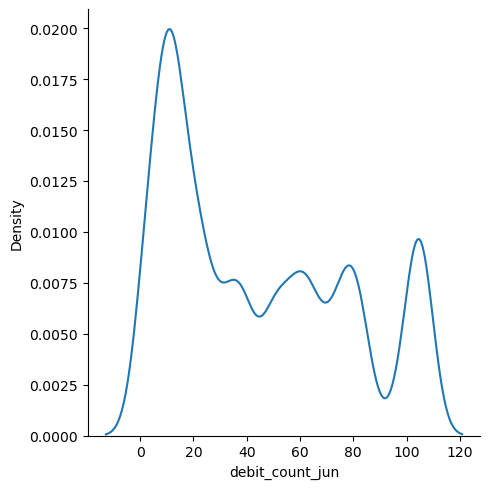

In [74]:
cols = ['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'cc_count_may', 
        'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'credit_count_apr', 'credit_count_may',
       'debit_count_may', 'credit_count_jun', 'debit_count_jun']
for c in cols:
    sns.displot(x = c, data = final_cleaned, kind='kde')
    plt.show()

In [41]:
# one-hot encoding on the account and gender column
# whereas label encoding on the income column

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lab_enc = LabelEncoder()
final_obj_1 = pd.DataFrame(lab_enc.fit_transform(final_obj[['Income']]),columns=['Income'])

C:\Users\Prateek\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
final_obj_2 = pd.get_dummies(final_obj.loc[:,['account_type','gender']], drop_first=True, dtype = int)

In [16]:
final_obj = pd.concat([final_obj_1,final_obj_2], axis=1)
final_obj

,Income,account_type_saving,gender_M
0,2,0,1
1,2,0,1
2,2,0,0
3,2,0,1
4,0,0,1
...,...,...,...
19995,2,0,0
19996,2,0,1
19997,2,0,0
19998,1,0,1


In [17]:
final_new = pd.concat([final_float,final_int,final_obj], axis=1)
final_new.head()

,Emp_Tenure_Years,region_code,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,dc_count_jun,card_lim,credit_count_apr,credit_count_may,debit_count_may,credit_count_jun,debit_count_jun,Income,account_type_saving,gender_M
0,30.1,628.0,5.0,7998.48,2289.00,9553.00,2879.58,6881.810,3124.0,8.0,...,30,519000,1,5,14,40,96,2,0,1
1,14.4,656.0,12.0,16479.64,415.00,7386.49,6763.00,12032.600,6738.0,19.0,...,16,402000,1,4,63,7,12,2,0,1
2,4.8,314.0,13.0,29272.03,27835.00,4170.53,25584.00,825.101,3778.0,12.0,...,37,114000,33,6,82,16,42,2,0,0
3,9.6,614.0,19.0,9662.31,5306.39,5261.00,11934.79,7996.000,390.0,24.0,...,1,298000,7,2,78,2,10,2,0,1
4,12.0,750.0,18.0,13239.86,7063.00,19193.13,22304.86,5984.750,4933.0,100.0,...,81,381000,1,3,108,21,12,0,0,1


In [92]:
final_new.shape

(20000, 43)

In [19]:
final_new1 = final_new.copy() ## copy of the final dataset

In [132]:
final_new.isnull().sum()

Emp_Tenure_Years                   0
region_code                        1
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
max_credit_amount_apr              0
debit_amount_may                   0
credit_amount_may                  0
max_credit_amount_may              0
debit_amount_jun                   0
credit_amount_jun                  0
max_credit_amount_jun              0
emi_active                         1
cc_cons                         5000
age                                0
T

In [20]:
final_new.dropna(inplace=True)

In [96]:
final_new.shape

(14997, 43)

In [20]:
final_new['cc_cons'].describe()

count     14997.000000
mean      53193.011102
std       91550.849992
min        1290.850000
25%        6768.000000
50%       13365.000000
75%       20105.000000
max      309852.000000
Name: cc_cons, dtype: float64

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1000 with 0 Axes>

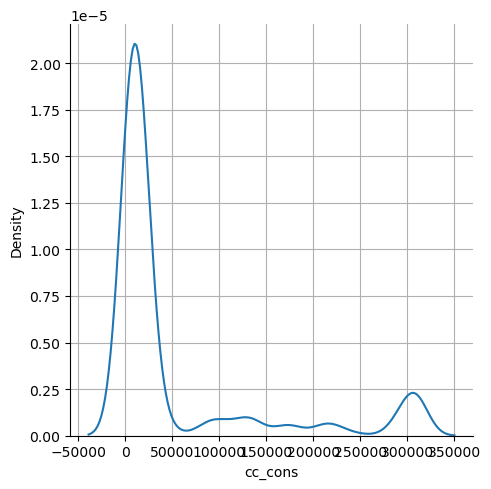

In [23]:
plt.figure(figsize=(15,10))
sns.displot(data=final_new['cc_cons'], kind='kde')
plt.grid()
plt.show()

In [51]:
# the y variable is highly positive skewed curve 
# so we need to do some transformation of the column so changing the zero 
# and negative entries to mean

C:\Users\Prateek\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1000 with 0 Axes>

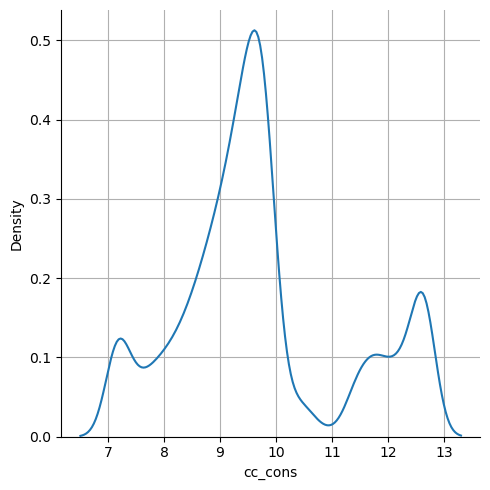

In [100]:
plt.figure(figsize=(15,10))
sns.displot(data=np.log(final_new['cc_cons']), kind='kde')
plt.grid()
plt.show()

In [21]:
# creating new log(cc_cons) column
final_new['ln_cc_cons'] = np.log(final_new['cc_cons'])

In [102]:
final_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14997 entries, 111 to 15110
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Emp_Tenure_Years              14997 non-null  float64
 1   region_code                   14997 non-null  float64
 2   Avg_days_between_transaction  14997 non-null  float64
 3   cc_cons_apr                   14997 non-null  float64
 4   dc_cons_apr                   14997 non-null  float64
 5   cc_cons_may                   14997 non-null  float64
 6   dc_cons_may                   14997 non-null  float64
 7   cc_cons_jun                   14997 non-null  float64
 8   dc_cons_jun                   14997 non-null  float64
 9   cc_count_apr                  14997 non-null  float64
 10  investment_1                  14997 non-null  float64
 11  investment_2                  14997 non-null  float64
 12  investment_3                  14997 non-null  float64
 13  inve

In [22]:
X = final_new[final_new.columns.difference(['cc_cons','ln_cc_cons'])]
y = final_new['ln_cc_cons']

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14997 entries, 111 to 15110
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg_days_between_transaction  14997 non-null  float64
 1   Emp_Tenure_Years              14997 non-null  float64
 2   Income                        14997 non-null  int32  
 3   NetBanking_Flag               14997 non-null  int64  
 4   Tenure_with_Bank              14997 non-null  int64  
 5   account_type_saving           14997 non-null  int32  
 6   age                           14997 non-null  int64  
 7   card_lim                      14997 non-null  int64  
 8   cc_cons_apr                   14997 non-null  float64
 9   cc_cons_jun                   14997 non-null  float64
 10  cc_cons_may                   14997 non-null  float64
 11  cc_count_apr                  14997 non-null  float64
 12  cc_count_jun                  14997 non-null  int64  
 13  cc_c

In [113]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 14997 entries, 111 to 15110
Series name: ln_cc_cons
Non-Null Count  Dtype  
--------------  -----  
14997 non-null  float64
dtypes: float64(1)
memory usage: 234.3 KB


In [23]:
# splitting the data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [25]:
# fit the model on linear regression
from sklearn.linear_model import LinearRegression
lnr_reg = LinearRegression()
lnr_reg.fit(X_train_scaled, y_train)

# predicting the y values
y_pred_train = lnr_reg.predict(X_train_scaled)
y_pred_test = lnr_reg.predict(X_test_scaled)

# Evaluating the linear regression model
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE:', mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))
print('Test MSE:', mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))

print('Train R2:', r2_score(np.exp(y_train), np.exp(y_pred_train)))
print('Test R2:', r2_score(np.exp(y_test), np.exp(y_pred_test)))

Train MSE: 9699948071.055216
Test MSE: 9801323394.18341
Train R2: -0.1621775564903185
Test R2: -0.15831702253226232


In [26]:
# fit the model on KNN
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=4)
knn_reg.fit(X_train_scaled, y_train)

# predicting the y values
y_pred_train = knn_reg.predict(X_train_scaled)
y_pred_test = knn_reg.predict(X_test_scaled)

# Evaluating the knn regression model
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE:', mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))
print('Test MSE:', mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))

print('Train R2:', r2_score(np.exp(y_train), np.exp(y_pred_train)))
print('Test R2:', r2_score(np.exp(y_test), np.exp(y_pred_test)))

Train MSE: 8175341837.147929
Test MSE: 9942390475.59093
Train R2: 0.020489725288183158
Test R2: -0.17498828162062652


In [28]:
# fit the model on Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=0)
rf_reg.fit(X_train_scaled, y_train)

# predicting the y values
y_pred_train = rf_reg.predict(X_train_scaled)
y_pred_test = rf_reg.predict(X_test_scaled)

# Evaluating the RF regression model
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE:', mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))
print('Test MSE:', mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))

print('Train R2:', r2_score(np.exp(y_train), np.exp(y_pred_train)))
print('Test R2:', r2_score(np.exp(y_test), np.exp(y_pred_test)))

Train MSE: 9658539774.35957
Test MSE: 9803584344.226482
Train R2: -0.15721631414967407
Test R2: -0.15858422082953938


In [29]:
# fit the model on Support Vector Machine
from sklearn.svm import SVR
svm_reg = SVR(epsilon = 0.01)
svm_reg.fit(X_train_scaled, y_train)

# predicting the y values
y_pred_train = svm_reg.predict(X_train_scaled)
y_pred_test = svm_reg.predict(X_test_scaled)

# Evaluating the SVM regression model
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE:', mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))
print('Test MSE:', mean_squared_error(np.exp(y_test), np.exp(y_pred_test)))

print('Train R2:', r2_score(np.exp(y_train), np.exp(y_pred_train)))
print('Test R2:', r2_score(np.exp(y_test), np.exp(y_pred_test)))

Train MSE: 9465777817.260523
Test MSE: 10040892752.844261
Train R2: -0.13412097192262107
Test R2: -0.18662924681604443
